
#Regresión lineal

Una regresión lineal ajusta a un modelo lineal con coeficientes para minimizar el residuo de la suma de cuadrados entre el valor observado y el predictivo.

Como cualquier función lineal se tiene una variable independiente X y una dependiente Y, las cuales forman la ecuación de la recta:  

$$y=mx+b$$

>Arreglos

Las variables pueden estar descritas medante un arreglo. Hay que considerar que el modelo tiene como argumentos arreglos de dos  dimensiones. Para este caso, es mejor utilizar la biblioteca **numpy** y en la variable X hay que redimensionar.  



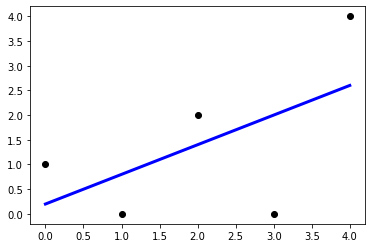

In [ ]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

# ingresar datos de entrenamiento
x = np.array([0, 1, 2, 3, 4]).reshape(-1, 1)
y = np.array([1, 0, 2, 0, 4])

# entrenar el modelo y predecir
model = linear_model.LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

# graficar datos y predicción
plt.scatter(x, y,  color='black')
plt.plot(x, y_pred, color='blue', linewidth=3)
plt.ylim
plt.show()

>CSV

Otra manera de entrada es mediante archivos separados por comas. En este caso se puede hacer uso de la biblioteca **pandas**.

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128]


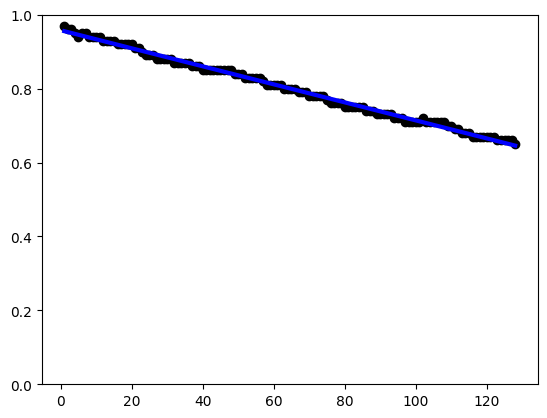

[0.62865189]
[0.61646076]
[0.6115843]
[0.58232558]
[0.57744913]
[0.32387355]
[0.06054506]
[-0.01260174]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model


# cargar el csv desde github mediante pandas
url = 'https://raw.githubusercontent.com/luisespino/artificial_intelligence/master/machine_learning_scikit_learn/pa.csv'
df = pd.read_csv(url)

# establecer los datos de entrenamiento

print(np.asarray(df['ciclomes']))
x = np.asarray(df['ciclomes']).reshape(-1,1)
#print(x)
y = df['pa']

# entrenar el modelo y predecir
regr = linear_model.LinearRegression()
regr.fit(x,y)
y_pred = regr.predict(x)

# graficar
plt.scatter(x, y,  color='black')
plt.plot(x, y_pred, color='blue', linewidth=3)
plt.ylim(0,1)
plt.show()

# predecir hasta que el poder adquisitivo se pierda al 100%
print(regr.predict([[135]])) # junio 2022
print(regr.predict([[140]])) # 1 año
print(regr.predict([[142]])) # Diciembre 2022
print(regr.predict([[154]])) # Diciembre 2023
print(regr.predict([[156]])) # Febrero 2024
print(regr.predict([[260]])) # 10 año
print(regr.predict([[368]])) # 20 año
print(regr.predict([[398]])) # 22.5 año

#Regresión polinomial

RMSE:  557.7368567298238
R2:  0.8218431246282154


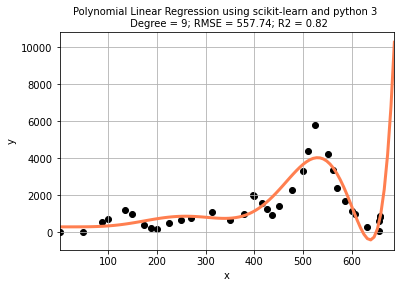

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv("https://raw.githubusercontent.com/luisespino/artificial_intelligence/master/machine_learning_scikit_learn/covid_avg.csv")


x = np.asarray(df['NO']).reshape(-1,1)
y = df['CASOS']

#print(x)
#print(y)

nb_degree = 9

polynomial_features = PolynomialFeatures(degree = nb_degree)
#print(X)
X_TRANSF = polynomial_features.fit_transform(x)

#----------------------------------------------------------------------------------------#
# Step 3: define and train a model

model = linear_model.LinearRegression()

model.fit(X_TRANSF, y)

#----------------------------------------------------------------------------------------#
# Step 4: calculate bias and variance

Y_NEW = model.predict(X_TRANSF)

rmse = np.sqrt(mean_squared_error(y,Y_NEW))
r2 = r2_score(y,Y_NEW)

print('RMSE: ', rmse)
print('R2: ', r2)

#----------------------------------------------------------------------------------------#
# Step 5: prediction

x_new_min = 1.0
x_new_max = 687.0

X_NEW = np.linspace(x_new_min, x_new_max,100)
X_NEW = X_NEW[:,np.newaxis]

X_NEW_TRANSF = polynomial_features.fit_transform(X_NEW)



Y_NEW = model.predict(X_NEW_TRANSF)

#Y_NEW =Y_NEW+Y_NEW*np.sin(Y_NEW)

#print(Y_NEW)
plt.scatter(x, y,  color='black')
plt.plot(X_NEW, Y_NEW, color='coral', linewidth=3)

plt.grid()
plt.xlim(x_new_min,x_new_max)
#plt.ylim(0,600000)

title = 'Degree = {}; RMSE = {}; R2 = {}'.format(nb_degree, round(rmse,2), round(r2,2))

plt.title("Polynomial Linear Regression using scikit-learn and python 3 \n " + title,
          fontsize=10)
plt.xlabel('x')
plt.ylabel('y')

#plt.savefig("polynomial_linear_regression.png", bbox_inches='tight')
plt.show()


# Hoja de trabajo
Ingresar al sitio del INE, buscar un dataset para crear ya sea una regresión lineal o una polinomial. Explicar la razón de la predicción.

https://www.ine.gob.gt/